In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
ruta_descargas = "../data/cdmx"

# read all files in the folder

files = os.listdir(ruta_descargas)
files = [f for f in files if f.endswith('.csv')]

In [3]:
df = pd.DataFrame()
for file in files:
    #Divide file name to get the date, time and contaminant
    year, month, cont = file.split("_")
    if year == "2024":
        
        segment = pd.read_csv(f"{ruta_descargas}/{file}", skiprows=1)
        
        # avoid unnamed columns
        segment = segment.loc[:, ~segment.columns.str.contains('^Unnamed')]
        
        
        cont = cont.split(".")[0]
        segment['pollutant'] = cont
        
        df = pd.concat([df, segment], axis=0)

In [4]:
pollutants = df['pollutant'].unique().tolist()

In [34]:
# COunt number of nan and not nan values
minidf = df.query(f"pollutant == '{pollutants[0]}'").drop(columns = ['Hora','pollutant'])
for col in minidf.columns:
    # replace string 'nr' with np.nan
    minidf[col] = minidf[col].replace('nr', np.nan)
    if col != 'Fecha':
        minidf[col] = pd.to_numeric(minidf[col])

minidf = minidf.groupby('Fecha').mean()
array = minidf.values

/tmp/ipykernel_12371/3247865918.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  minidf[col] = minidf[col].replace('nr', np.nan)


In [35]:
array 

array([[        nan, 26.33333333,         nan, ...,         nan,
                nan,         nan],
       [        nan, 15.54166667, 16.09090909, ...,         nan,
                nan,         nan],
       [        nan, 13.5       , 15.34782609, ...,         nan,
                nan,         nan],
       ...,
       [        nan, 15.95833333,         nan, ...,         nan,
                nan,         nan],
       [        nan, 20.66666667, 19.13636364, ...,         nan,
                nan,         nan],
       [        nan, 19.20833333, 19.26086957, ...,         nan,
                nan,         nan]])

In [36]:
array.shape

(366, 50)

In [37]:
array.T

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [26.33333333, 15.54166667, 13.5       , ..., 15.95833333,
        20.66666667, 19.20833333],
       [        nan, 16.09090909, 15.34782609, ...,         nan,
        19.13636364, 19.26086957],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

[Text(0, 0, 'ACO'),
 Text(0, 1, 'AJM'),
 Text(0, 2, 'AJU'),
 Text(0, 3, 'ATI'),
 Text(0, 4, 'BJU'),
 Text(0, 5, 'CAM'),
 Text(0, 6, 'CCA'),
 Text(0, 7, 'MON'),
 Text(0, 8, 'CHO'),
 Text(0, 9, 'COY'),
 Text(0, 10, 'CUA'),
 Text(0, 11, 'CUT'),
 Text(0, 12, 'FAC'),
 Text(0, 13, 'FAR'),
 Text(0, 14, 'GAM'),
 Text(0, 15, 'HGM'),
 Text(0, 16, 'INN'),
 Text(0, 17, 'IZT'),
 Text(0, 18, 'LLA'),
 Text(0, 19, 'LPR'),
 Text(0, 20, 'MER'),
 Text(0, 21, 'MGH'),
 Text(0, 22, 'MPA'),
 Text(0, 23, 'NEZ'),
 Text(0, 24, 'PED'),
 Text(0, 25, 'SAC'),
 Text(0, 26, 'SAG'),
 Text(0, 27, 'SFE'),
 Text(0, 28, 'SJA'),
 Text(0, 29, 'SUR'),
 Text(0, 30, 'TAH'),
 Text(0, 31, 'TEC'),
 Text(0, 32, 'TLA'),
 Text(0, 33, 'TLI'),
 Text(0, 34, 'TPN'),
 Text(0, 35, 'UAX'),
 Text(0, 36, 'UIZ'),
 Text(0, 37, 'VIF'),
 Text(0, 38, 'XAL'),
 Text(0, 39, 'CES'),
 Text(0, 40, 'IMP'),
 Text(0, 41, 'PLA'),
 Text(0, 42, 'SS1'),
 Text(0, 43, 'TAC'),
 Text(0, 44, 'AZC'),
 Text(0, 45, 'LAG'),
 Text(0, 46, 'TAX'),
 Text(0, 47, 'LVI'),
 T

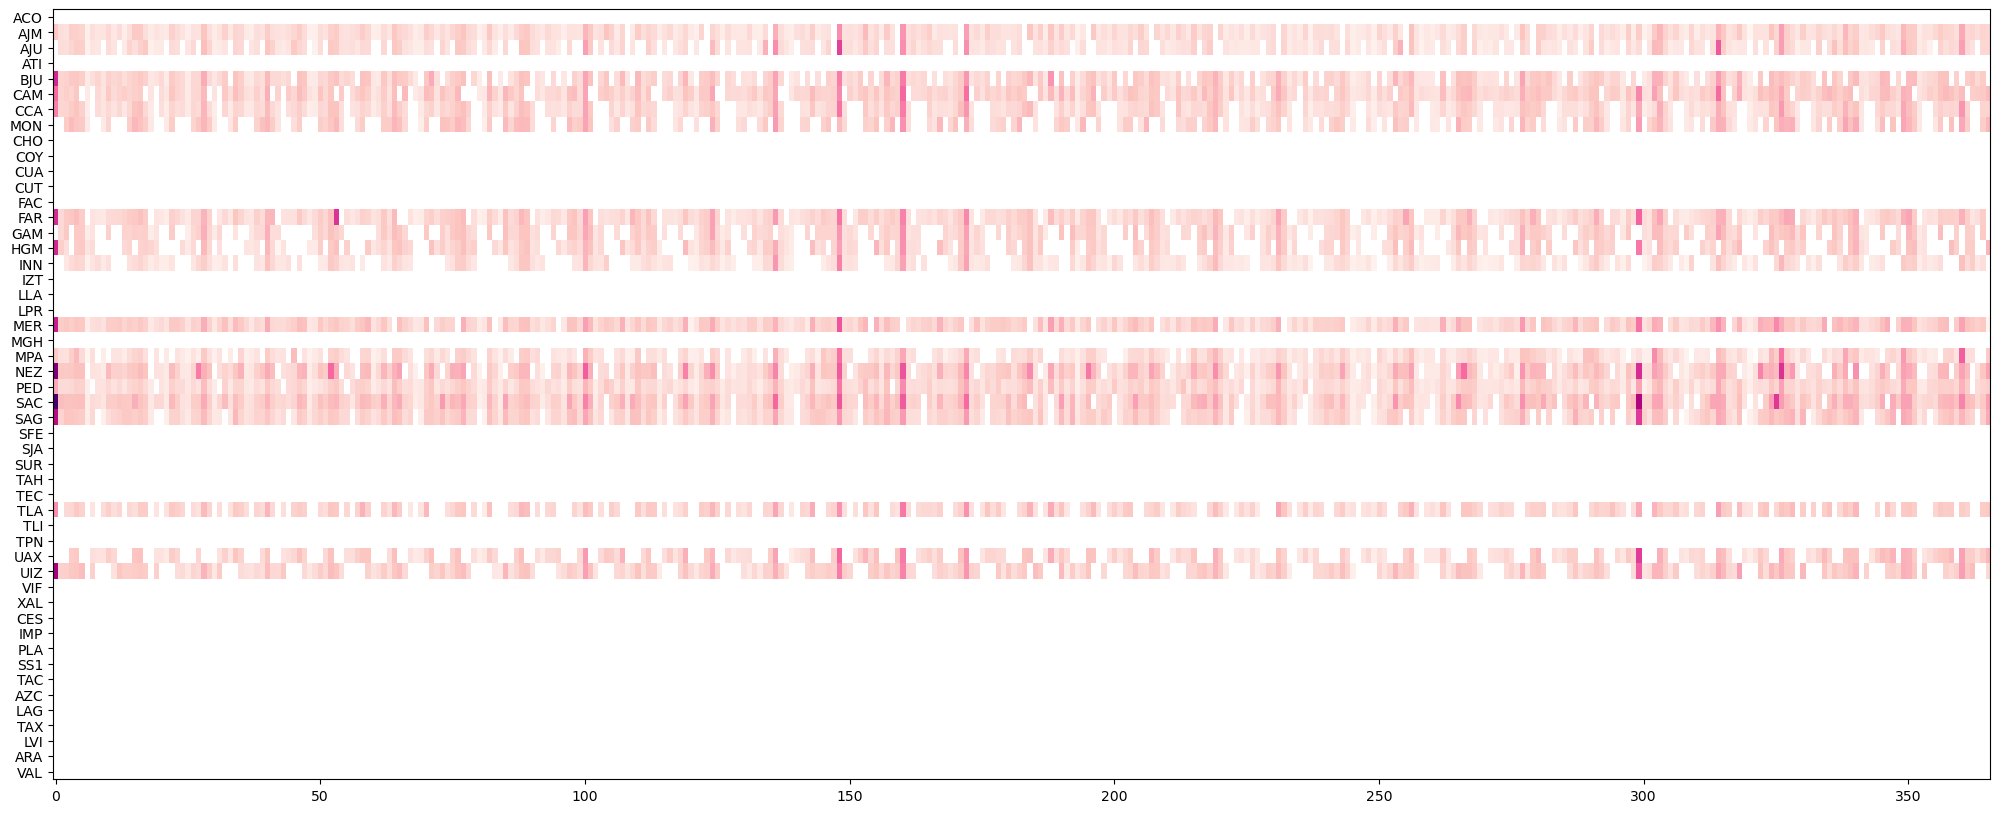

In [49]:
# Crea el gráfico con matplotlib
fig, ax = plt.subplots(figsize=(25, 10))  # Ajusta el ancho (15) para que las columnas se vean mejor

# Grafica los datos del DataFrame
ax.imshow(array.T, aspect='auto', cmap='RdPu')

# Columnas como nombre del eje y
ax.set_yticks(range(len(minidf.columns)))
ax.set_yticklabels(minidf.columns)

# Fondo negro
# ax.set_facecolor('black')